In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df1 =  pd.read_csv("test.csv", sep=",")

In [4]:
df2 =  pd.read_csv("train.csv", sep=",")

In [5]:
df = pd.concat([df1, df2])

In [6]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2012-08-01 00:00:00,summer,0,1,clear,27.88,31.820,79,11.1400,47
1,2012-08-01 01:00:00,summer,0,1,NaN,27.06,30.305,83,6.3200,33
2,2012-08-01 02:00:00,summer,0,1,clear,26.24,28.790,83,7.1500,13
3,2012-08-01 03:00:00,summer,0,1,clear,26.24,28.790,83,7.1500,7
4,2012-08-01 04:00:00,summer,0,1,NaN,26.24,29.545,78,8.9981,4
...,...,...,...,...,...,...,...,...,...,...
8602,2012-07-19 19:00:00,summer,0,1,clear,34.44,37.880,44,16.9979,533
8603,2012-07-19 20:00:00,summer,0,1,clear,33.62,38.635,49,11.1400,505
8604,2012-07-19 21:00:00,summer,0,1,snow,27.06,29.545,89,16.9979,332
8605,2012-07-19 22:00:00,summer,0,1,snow,27.06,29.545,89,NaN,68


In [6]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,9928.000000,10886.000000,10886.000000,8748.000000,10886.000000
mean,0.028569,0.680875,20.227438,23.655084,61.886460,14.310051,191.574132
std,0.166599,0.466159,7.783525,8.474601,19.245033,6.976184,181.144454
min,0.000000,0.000000,0.820000,0.760000,0.000000,3.260000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,47.000000,8.998100,42.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,19.120000,284.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [7]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
# LotFrontage: Linear feet of street connected to the property.
# LotArea: Lot size in square feet.
# OverallQual: Rates the overall material and finish of the house.
# OverallCond: Rates the overall condition of the house.
# YearBuilt: Original construction date.
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
# MasVnrArea: Masonry veneer area in square feet.
# BsmtFinSF1: Type 1 finished square feet.
# BsmtFinSF2: Type 2 finished square feet.
# BsmtUnfSF: Unfinished square feet of basement area.
# TotalBsmtSF: Total square feet of basement area.
# 1stFlrSF: First Floor square feet.
# 2ndFlrSF: Second floor square feet.
# LowQualFinSF: Low quality finished square feet (all floors).
# GrLivArea: Above grade (ground) living area square feet.
# BsmtFullBath: Basement full bathrooms.
# BsmtHalfBath: Basement half bathrooms.
# FullBath: Full bathrooms above grade.
# HalfBath: Half baths above grade.
# BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms).
# KitchenAbvGr: Kitchens above grade.
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
# Fireplaces: Number of fireplaces.
# GarageYrBlt: Year garage was built.
# GarageCars: Size of garage in car capacity.
# GarageArea: Size of garage in square feet.
# WoodDeckSF: Wood deck area in square feet.
# OpenPorchSF: Open porch area in square feet.
# EnclosedPorch: Enclosed porch area in square feet.
# 3SsnPorch: Three-season porch area in square feet.
# ScreenPorch: Screen porch area in square feet.
# PoolArea: Pool area in square feet.
# MiscVal: $Value of miscellaneous feature.
# MoSold: Month Sold (MM).
# YrSold: Year Sold (YYYY).
# SalePrice: Sale price $$.

In [8]:
df = df.drop('Id', axis=1)

In [9]:
df = df.fillna(-1)

In [10]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
list_obj = df.select_dtypes(object).columns
len(list_obj)

0

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
relationships = []
for col in list_obj:
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    df[col].fillna('missing', inplace=True)
    # Fit and transform the column to encode it
    df[col] = label_encoder.fit_transform(df[col])
    
    # Print the relationship between original and encoded values
    relationship = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("Relationship between original and encoded values:")
    print(relationship)
    relationships.append(relationship)

Relationship between original and encoded values:
{'female': 0, 'male': 1}
Relationship between original and encoded values:
{'A10': 0, 'A11': 1, 'A14': 2, 'A16': 3, 'A18': 4, 'A19': 5, 'A20': 6, 'A21': 7, 'A23': 8, 'A24': 9, 'A26': 10, 'A29': 11, 'A31': 12, 'A32': 13, 'A34': 14, 'A36': 15, 'A5': 16, 'A6': 17, 'A7': 18, 'A9': 19, 'B10': 20, 'B101': 21, 'B102': 22, 'B11': 23, 'B18': 24, 'B19': 25, 'B20': 26, 'B22': 27, 'B24': 28, 'B26': 29, 'B28': 30, 'B3': 31, 'B30': 32, 'B35': 33, 'B36': 34, 'B37': 35, 'B38': 36, 'B39': 37, 'B4': 38, 'B41': 39, 'B42': 40, 'B45': 41, 'B49': 42, 'B5': 43, 'B50': 44, 'B51 B53 B55': 45, 'B52 B54 B56': 46, 'B57 B59 B63 B66': 47, 'B58 B60': 48, 'B61': 49, 'B69': 50, 'B71': 51, 'B73': 52, 'B77': 53, 'B78': 54, 'B79': 55, 'B80': 56, 'B82 B84': 57, 'B86': 58, 'B94': 59, 'B96 B98': 60, 'C101': 61, 'C103': 62, 'C104': 63, 'C105': 64, 'C106': 65, 'C110': 66, 'C111': 67, 'C116': 68, 'C118': 69, 'C123': 70, 'C124': 71, 'C125': 72, 'C126': 73, 'C128': 74, 'C130': 75

/tmp/ipykernel_26731/4143007478.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('missing', inplace=True)
/tmp/ipykernel_26731/4143007478.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [12]:
df.shape

(1460, 37)

In [13]:
import numpy as np

def generate_unique_ids(n):
    # Define the range to pick from; ensure the range is at least as large as n
    # For instance, if you want IDs from 0 to 9999 for n = 1000:
    max_id = n - 1
    
    # Make sure that n is not larger than the range
    if n > max_id + 1:
        raise ValueError("n must be less than or equal to max_id + 1")
    
    # Generate unique random IDs
    unique_ids = np.random.choice(range(max_id + 1), size=n, replace=False)
    
    return unique_ids

In [14]:
df['id'] = generate_unique_ids(df.shape[0])

In [15]:
df.fillna(-1, inplace=True)

In [16]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,id
0,20,74.0,10206,3,3,1952,1952,0.0,0,0,...,0,0,0,0,0,0,7,2009,82000,1214
1,30,60.0,5400,5,6,1920,1950,0.0,0,0,...,20,94,0,0,0,0,1,2007,86000,1089
2,20,75.0,11957,8,5,2006,2006,53.0,24,0,...,104,0,0,0,0,0,7,2008,232000,466
3,90,-1.0,11500,5,6,1976,1976,164.0,0,0,...,0,0,0,0,0,0,6,2007,136905,1199
4,120,43.0,3182,7,5,2005,2006,16.0,16,0,...,0,0,0,0,0,0,5,2009,181000,1149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,51.0,4712,4,7,1946,1950,0.0,384,0,...,57,0,0,63,0,0,8,2006,121600,1131
996,20,-1.0,10659,5,6,1961,1961,0.0,915,0,...,319,0,0,0,0,0,1,2006,136500,711
997,20,-1.0,11717,6,6,1970,1970,571.0,0,0,...,0,0,0,0,0,0,2,2009,185000,373
998,30,60.0,9786,3,4,1922,1950,0.0,0,0,...,100,48,0,0,0,0,5,2006,91000,846


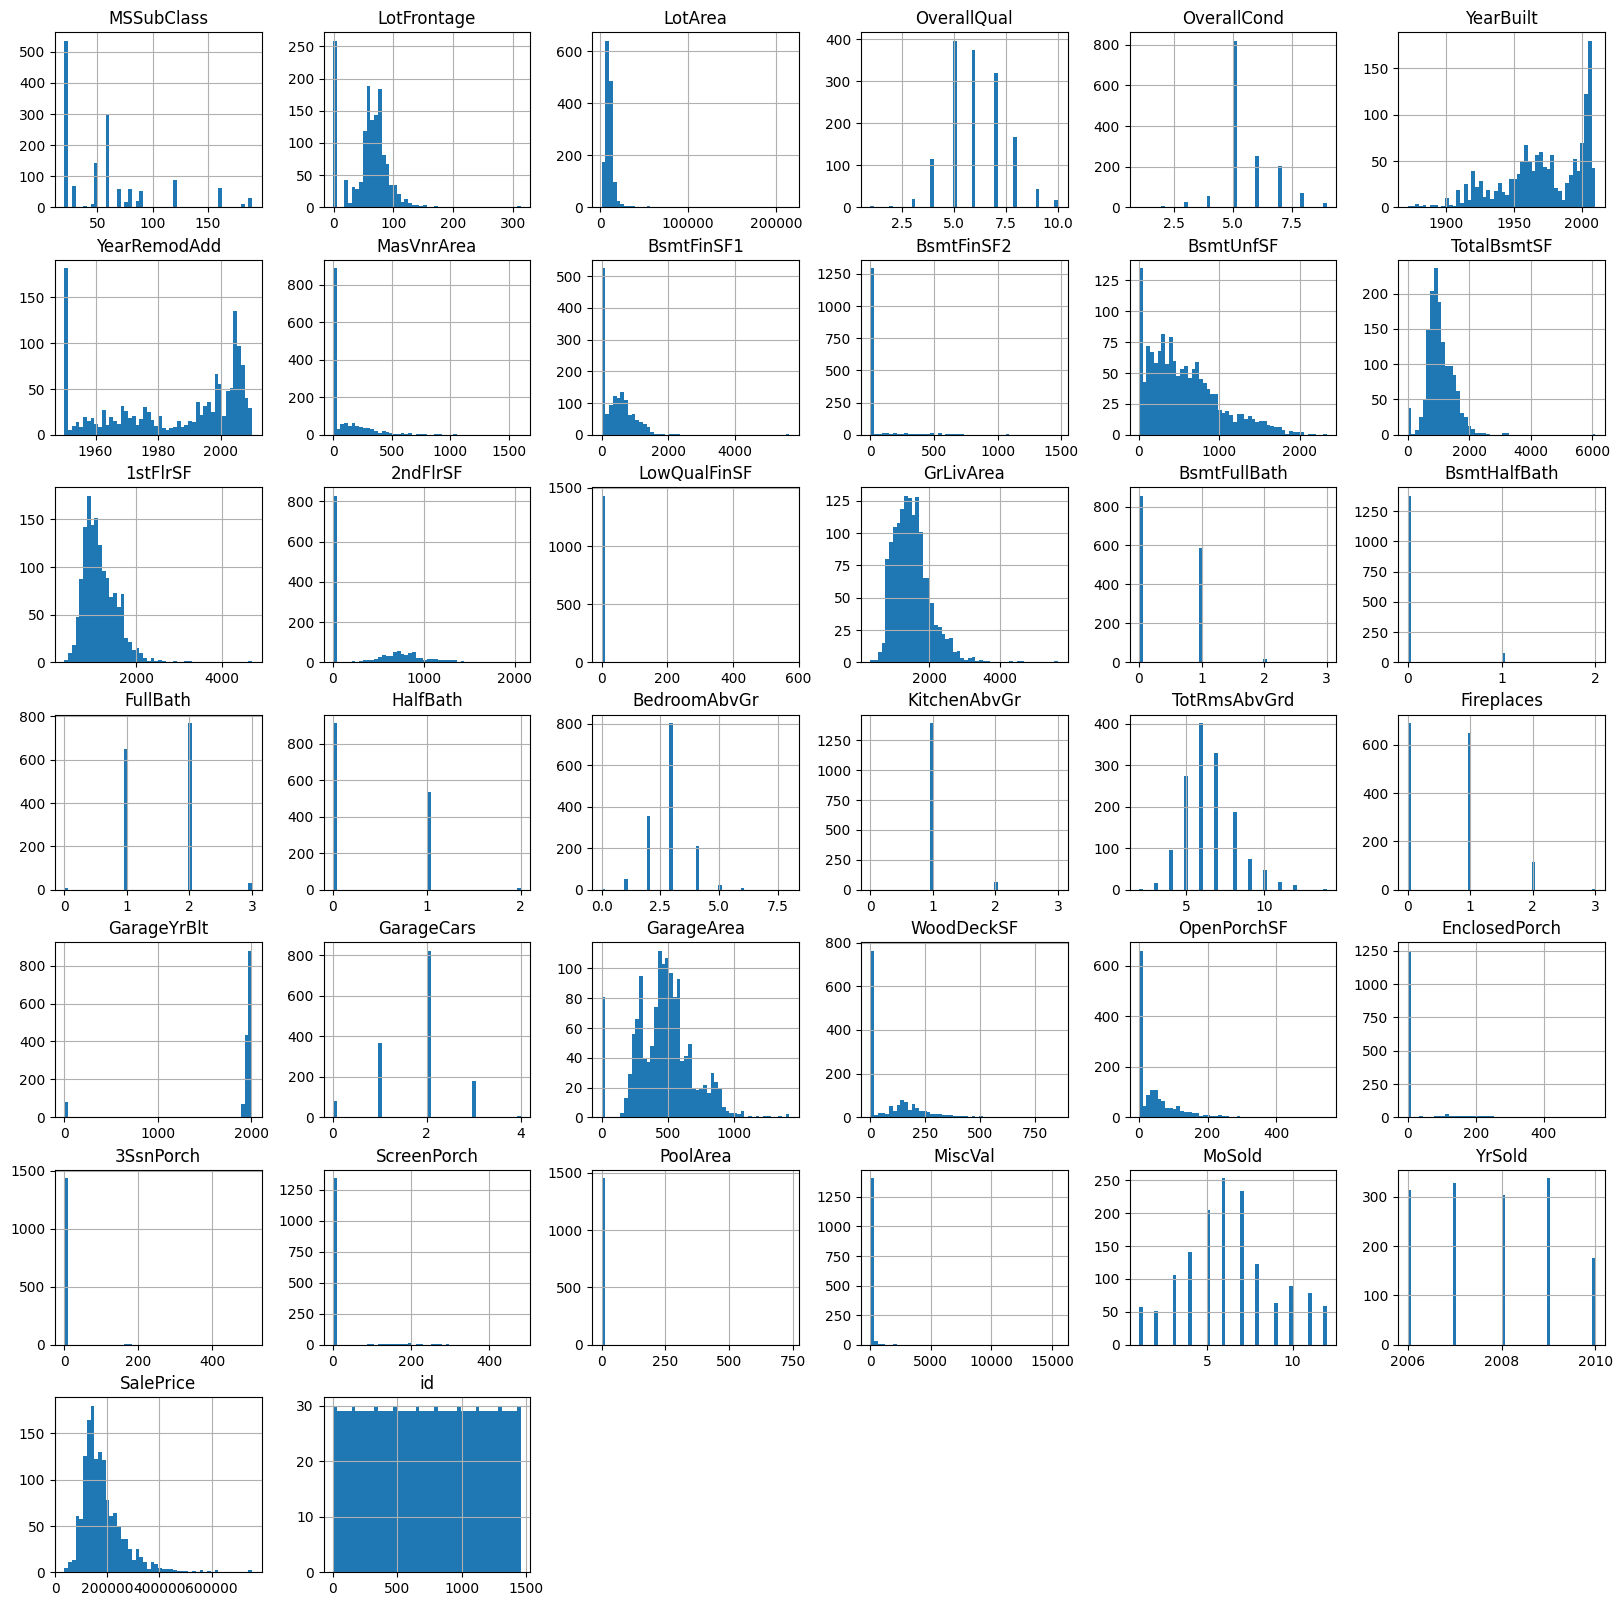

In [34]:
df.hist(figsize=(20,20), bins=50);

In [17]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'id'],
      dtype='object')

<Axes: xlabel='None', ylabel='SalePrice'>

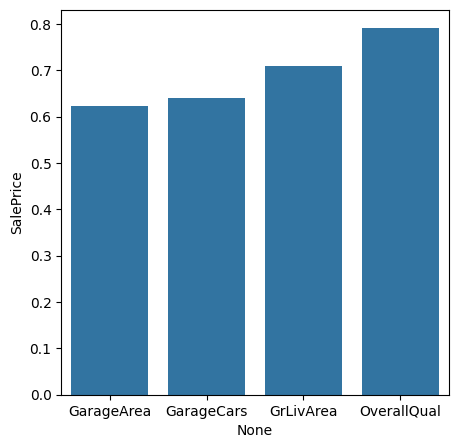

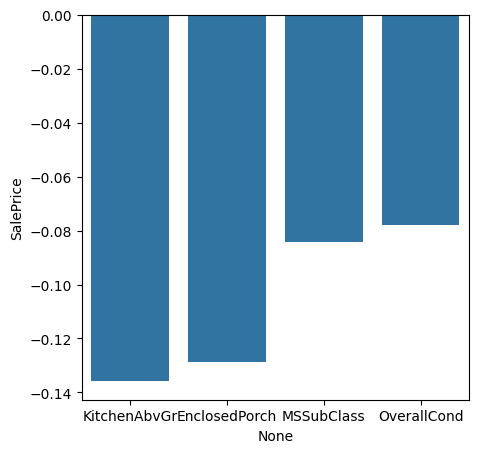

In [21]:
corrs = df.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)

In [19]:
df.set_index('id', inplace=True)

Index(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [30]:
new_df = df.loc[:,df.columns[:-1][corrs.abs() > 0.3]]

In [31]:
new_df['SalePrice'] = df['SalePrice']

In [33]:
df = new_df

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df.columns

Index(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
df = df.sort_index()

In [39]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

<Axes: xlabel='SalePrice', ylabel='Count'>

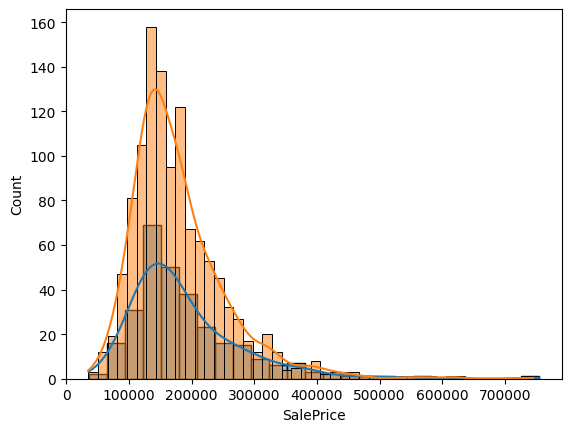

In [40]:
sns.histplot(df_test['SalePrice'], kde=True)
sns.histplot(df_train['SalePrice'], kde=True)

In [49]:
df_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,,,,,
892,20,100.0,10004,6,6,1964,1964,180.0,196,345,...,0,0,0,0,152,0,0,2,2009,167000
1105,90,75.0,9825,5,5,1965,1965,0.0,0,0,...,0,0,0,0,0,0,0,5,2010,100000
413,20,105.0,15431,10,5,2008,2008,200.0,1767,539,...,0,72,0,0,170,0,0,4,2009,555000
522,30,-1.0,10020,1,1,1922,1950,0.0,350,0,...,0,0,0,0,0,0,0,3,2009,61000
1036,70,60.0,8730,6,7,1915,2003,0.0,0,0,...,0,0,0,0,259,0,0,7,2007,153575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,50,100.0,12665,5,8,1915,1950,0.0,0,0,...,418,0,194,0,0,0,0,6,2008,153900
1361,20,72.0,10007,5,7,1959,2006,54.0,806,0,...,0,0,0,0,0,0,0,8,2008,145500
802,190,60.0,11340,4,6,1885,1950,0.0,0,0,...,0,0,114,0,0,0,0,4,2010,122500


In [41]:
df_train.to_csv('module3_exercise_train.csv')

In [42]:
df_test.iloc[:,:-1].to_csv('module3_exercise_test.csv')

In [44]:
df_test.iloc[:,:-1]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
id,,,,,,,,,,,,,,,,
892,3,1,8,1,2006.0,3,788,0,191,0,0,0,0,0,3,2007
1105,3,1,8,2,1965.0,2,513,0,0,0,0,0,0,0,6,2009
413,2,1,7,3,1955.0,1,303,476,0,0,0,142,0,0,11,2009
522,3,1,7,0,1993.0,2,457,370,70,0,238,0,0,0,2,2010
1036,3,1,6,0,1999.0,2,506,0,34,0,0,0,0,0,3,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,4,1,10,1,1969.0,1,336,272,0,42,0,116,0,0,3,2010
1361,3,1,8,0,2003.0,2,500,144,68,0,0,0,0,0,9,2007
802,3,1,7,1,2002.0,2,577,0,211,0,0,0,0,0,3,2008


In [45]:
df_test[['SalePrice']].to_csv('module3_exercise_test_target.csv')

In [51]:
y_train = df_train['SalePrice']
X_train = df_train.iloc[:,:-1]

y_test = df_train['SalePrice']
X_test = df_train.iloc[:,:-1]

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [58]:
# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mean_absolute_error(y_test, y_pred)

32389.10658256264

In [59]:
df.columns

Index(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
# import catboost
# from catboost import CatBoostClassifier


In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy of the model: 0.7709923664122137
Confusion Matrix:
 [[126  18]
 [ 42  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.78      0.77      0.77       262



/home/raphael/admin_data_science_practice/website/public/modules/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
